<a href="https://colab.research.google.com/github/rangasuthan/Medical-Cost-Personal-Dataset/blob/main/Medical_Cost_Personal_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/insurance.csv')

# Display the first few rows of the dataset
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Convert categorical columns to numerical
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data = pd.get_dummies(data, columns=['region'], drop_first=True)

# Display the first few rows after preprocessing
data.head()


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [4]:
from sklearn.model_selection import train_test_split

# Features and target
X = data.drop('charges', axis=1)
y = data['charges']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (1070, 8)
Testing set size: (268, 8)


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_reg.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression MSE:", mse_linear)
print("Linear Regression R²:", r2_linear)


Linear Regression MSE: 33596915.85136143
Linear Regression R²: 0.7835929767120725


In [6]:
from sklearn.linear_model import BayesianRidge

# Initialize and train the Bayesian Regression model
bayesian_reg = BayesianRidge()
bayesian_reg.fit(X_train, y_train)

# Make predictions
y_pred_bayesian = bayesian_reg.predict(X_test)

# Evaluate the model
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)
r2_bayesian = r2_score(y_test, y_pred_bayesian)

print("Bayesian Regression MSE:", mse_bayesian)
print("Bayesian Regression R²:", r2_bayesian)


Bayesian Regression MSE: 33622140.28076541
Bayesian Regression R²: 0.7834304991886711


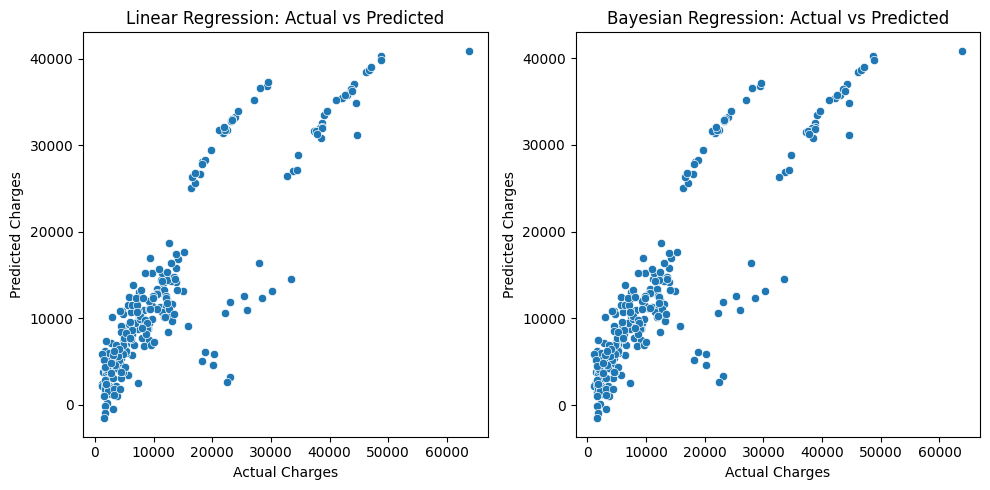

In [8]:
# Visualization
plt.figure(figsize=(10,5))

# Plot Actual vs Predicted for Linear Regression
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_linear)
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")

# Plot Actual vs Predicted for Bayesian Regression
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_bayesian)
plt.title("Bayesian Regression: Actual vs Predicted")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")

plt.tight_layout()
plt.show()


In [9]:
print(f"Linear Regression MSE: {mse_linear:.2f}, R²: {r2_linear:.2f}")
print(f"Bayesian Regression MSE: {mse_bayesian:.2f}, R²: {r2_bayesian:.2f}")


Linear Regression MSE: 33596915.85, R²: 0.78
Bayesian Regression MSE: 33622140.28, R²: 0.78
